# Visualisation using

![Matplotlib](http://upload.wikimedia.org/wikipedia/en/5/56/Matplotlib_logo.svg)

# Table of Contents

1. [Notebook Setup](#setup)
2. [Simple Line Plots](#line_plots)
    * [Using different styles for plots](#different_styles)
    * [Setting x and y limits](#setting_limits)
    * [Labeling plots](#plot_labels)
        - [Label formatting](#label_formatting)
        - [LaTeX labels](#latex_labels)
    * [Legends](#legends)
    * [Grids](#grids)
    * [Axis scales](#axis_scales)
    * [Ticks](#ticks)
    * [Multiple lines in the same plot](#multiple_lines)
    * [Multiple plots in the same figure](#multiple_plots)
        - [Shared axes](#shared_axes)
        - [Tight layout](#tight_layout)
        - [Inset plots](#inset_plots)
3. [Error bars](#error_bars)
    * [Asymmetrical errors](#asym_errors)
    * [Upper and lower limits](#upper_limits)
4. [Polar plots](#polar_plots)
5. [Histograms](#histograms)
    * [1D Histograms](#hist1d)
    * [2D Histograms](#hist2d)
6. [Scatter Plots](#scatter)
7. [Object-Oriented Syntax](#oo_syntax)
8. [MJD Date axis](#mjd)
9. [Plots for Publication](#publication_plots)
    * [Plot styles](#plot_styles)
    * [Saving figures](#save_figures)

<a id=setup></a>
# Notebook Setup (run me first!)

First, we apply a "magic command" to make plots appear "inline" inside the notebook. Alternatively, we could allow plots to appear in a separate window.

In [1]:
# only for the notebook
%matplotlib inline
# only in the ipython shell
# %matplotlib

In order to work with Matplotlib, the library must be imported first. So we do not have to type so much, we give it a shorter name:

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Make the size and fonts larger for this presentation
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

Matplotlib works best with numpy arrays, so we import `numpy` as well

In [4]:
import numpy as np

<a id=line_plots></a>
# Simple Line Plots

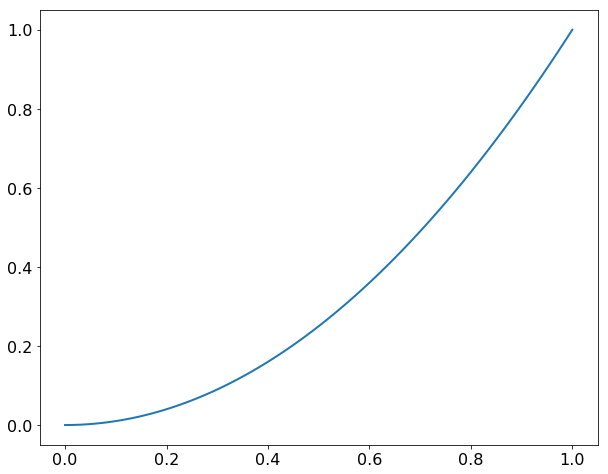

In [5]:
x = np.linspace(0, 1, 101) # 101 numbers from 0 to 1

plt.plot(x, x**2)
# If not interactive, e.g. in a script: 
# plt.show()

<a id=different_styles></a>
## Using different styles for plots

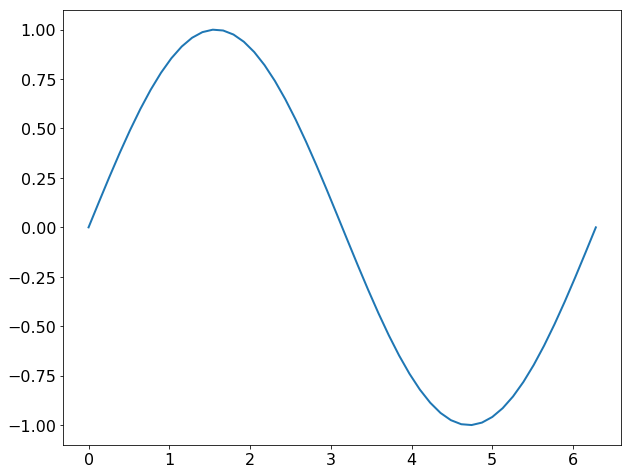

In [6]:
t = np.linspace(0, 2 * np.pi)   # 50 points between 0 and 2π
plt.plot(t, np.sin(t));

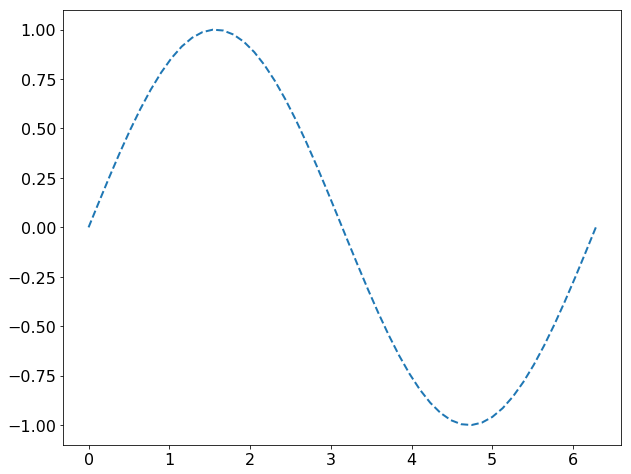

In [7]:
plt.plot(t, np.sin(t), '--');

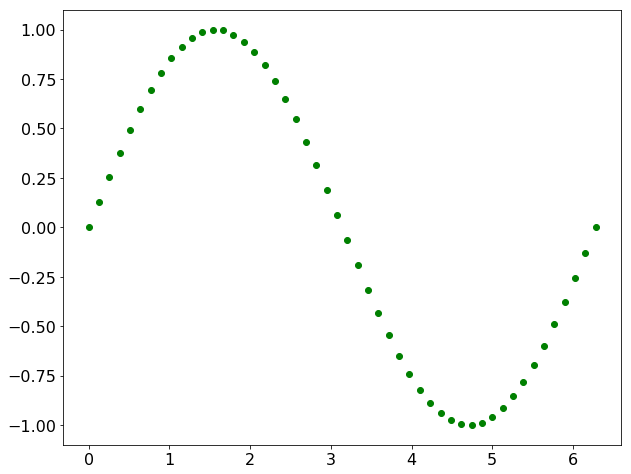

In [8]:
plt.plot(t, np.sin(t), 'go')
# plt.plot(t, np.sin(t), color='green', marker='o', linestyle='');   # same thing!

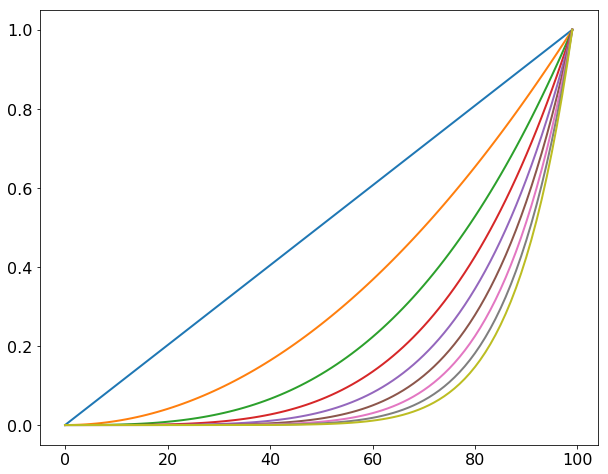

In [9]:
# new in matplotlib 2.0, all colors of the color rotation available as C<N>
x = np.linspace(0, 1, 100)
for n in range(9):
    plt.plot(x**(n + 1), color='C{}'.format(n))

All styles and colors: [matplotlib.axes.Axes.plot](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot)



<a id=setting_limits></a>
### Setting x and y limits

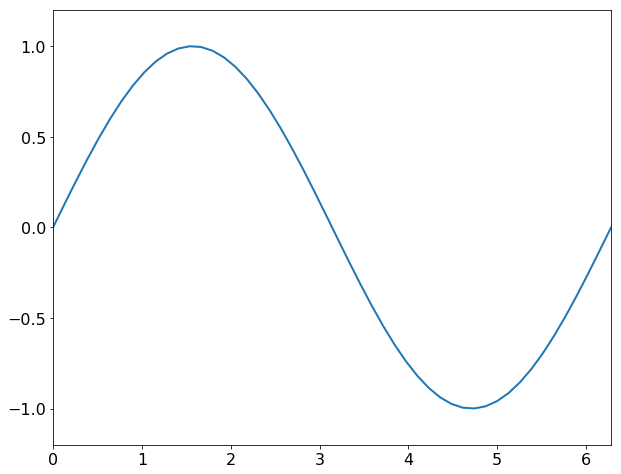

In [10]:
plt.plot(t, np.sin(t))
plt.xlim(0, 2*np.pi)
plt.ylim(-1.2, 1.2);

<a id=plot_labels></a>
## We are still lacking something important
![XKCD comic on why you should label your axes.](http://imgs.xkcd.com/comics/convincing.png "And if you labeled your axes, I could tell you exactly how MUCH better.")


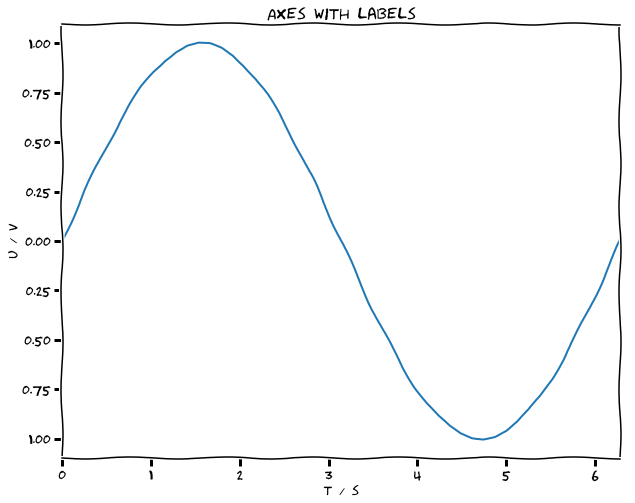

In [7]:
with plt.xkcd():
    plt.title('Axes with labels')
    plt.plot(t, np.sin(t))
    plt.xlabel('t / s')
    plt.ylabel('U / V')
    plt.ylim(-1.1, 1.1)
    plt.xlim(0, 2*np.pi)

### A side note on units


Contrary to some customs in HEP or Astronomy, the BiPM has strict rules on how to typeset quantities, numbers and units in table headers and axis labels:

> Symbols for units are treated as mathematical entities. In expressing the value of a
quantity as the product of a numerical value and a unit, both the numerical value and
the unit may be treated by the ordinary rules of algebra.
It is often convenient to
write the quotient of a quantity and a unit in this way for the heading of a column in a
table, so that the entries in the table are all simply numbers. [...]
The axes of a graph may also be labelled in this way, so that the tick marks are
labelled only with numbers


[Bureau International des Poids et Measures,  The International System of Units, Chapter 5, Section 3](http://www.bipm.org/utils/common/pdf/si_brochure_8_en.pdf)

A physical quantity is always a product of a number and a unit, so what is shown, is the quantity divided by the unit.

Especially square brackets have a totally different meaning and are highly problematic if it comes to mathematical operations on quantities like $\log(E / 1\,\mathrm{GeV})$

<a id=label_formatting></a>
### Label formatting

These options can be set globally in a matplotlibrc file,
see https://matplotlib.org/users/customizing.html

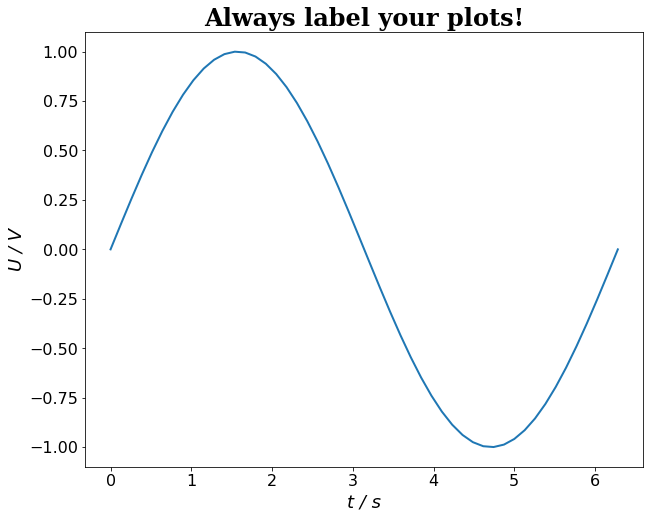

In [8]:
plt.plot(t, np.sin(t))

title_font = {'fontsize': 24, 'fontweight': 'bold', 'family': 'serif'}
axes_font = {'fontsize': 18, 'fontstyle': 'italic'}

plt.xlabel('t / s', axes_font)
plt.ylabel('U / V', axes_font)
plt.title('Always label your plots!', title_font);

<a id=latex_labels></a>
### Matplotlib can handle a rather complete subset of LaTeX in any text

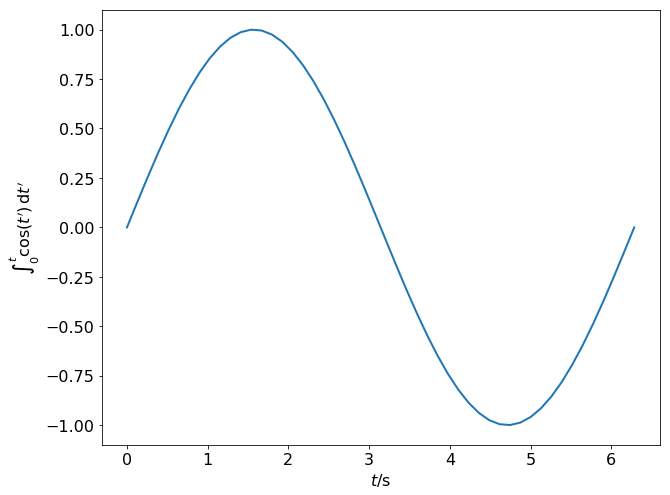

In [9]:
plt.plot(t, np.sin(t))
plt.xlabel(r'$t / \mathrm{s}$')   # leading r means "raw", so that '\' is handled correctly
plt.ylabel(r"$\int_0^t \cos(t') \, \mathrm{d}t'$");

<a id=legends></a>
## Legends

Matplotlib can create legends automatically for plot objects that have a label.

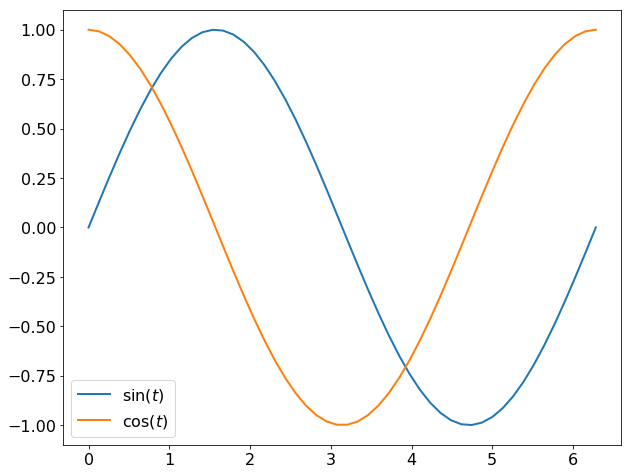

In [10]:
plt.plot(t, np.sin(t), label=r'$\sin(t)$')
plt.plot(t, np.cos(t), label=r'$\cos(t)$')
plt.legend()
#plt.legend(loc='upper center')

None # only to avoid cluttering the notebook

<a id=grids></a>
## Grids

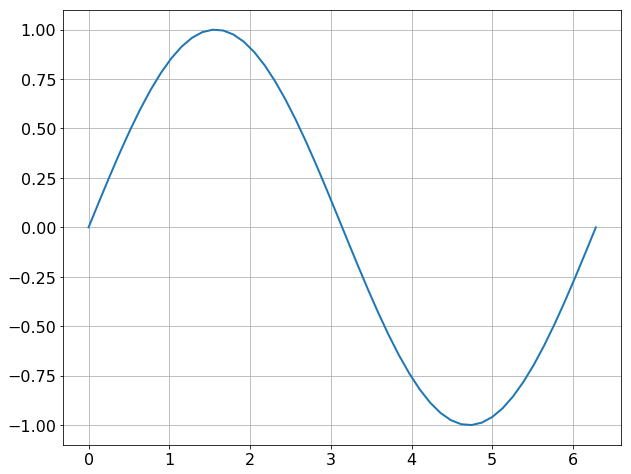

In [11]:
plt.plot(t, np.sin(t))
plt.grid()

<a id=axis_scales></a>
## Axis-Scales

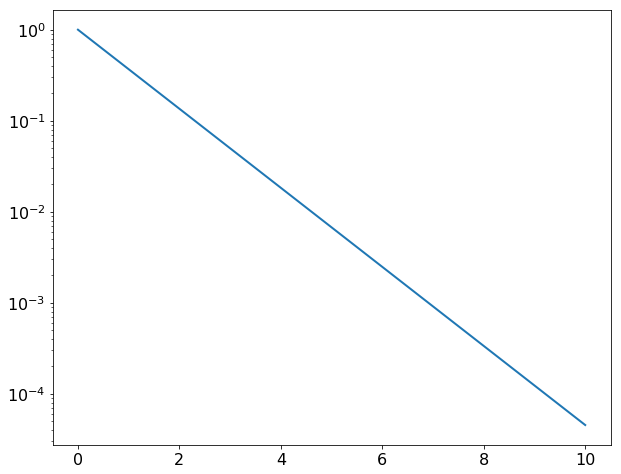

In [12]:
x = np.linspace(0, 10)
# x = np.logspace(-1, 2, 100)

plt.plot(x, np.exp(-x))
plt.yscale('log')
# plt.xscale('log')

<a id=ticks></a>
## Ticks

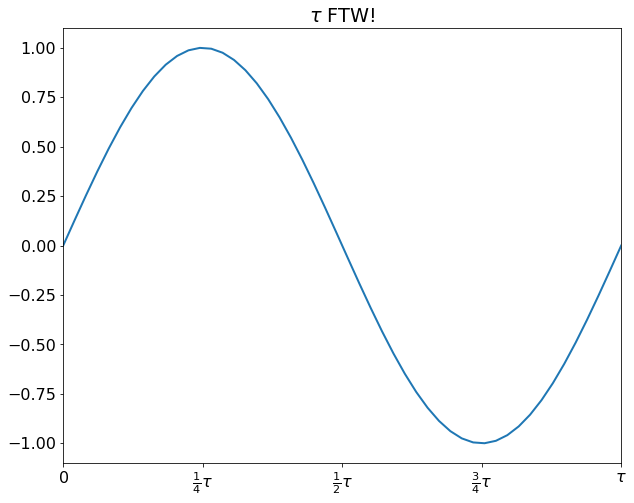

In [13]:
x = np.linspace(0, 2*np.pi)

plt.plot(x, np.sin(x))
plt.xlim(0, 2*np.pi)
# First argument: position, second argument: labels
plt.xticks(
    np.arange(0, 2*np.pi + 0.1, np.pi/2),
    [r"$0$", r"$\frac{1}{4}\tau$", r"$\frac{1}{2}\tau$", r"$\frac{3}{4}\tau$", r"$\tau$"]
)
plt.title(r"$\tau$ FTW!")   # https://tauday.com/tau-manifesto
None

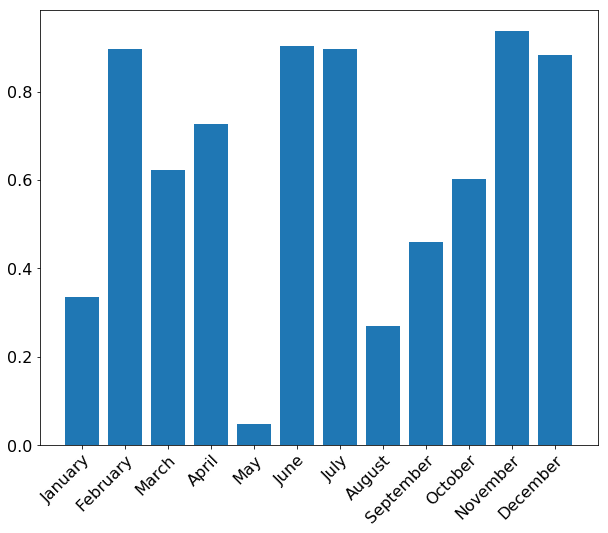

In [14]:
months = ['January',
          'February',
          'March',
          'April',
          'May',
          'June',
          'July',
          'August',
          'September',
          'October',
          'November',
          'December']

plt.bar(np.arange(12), np.random.rand(12))
plt.xticks(
    np.arange(12),
    months,
    rotation=45,
    rotation_mode='anchor',
    horizontalalignment='right',  # or ha
    verticalalignment='top',      # or va
);

<a id=multiple_lines></a>
## Multiple lines in the same plot

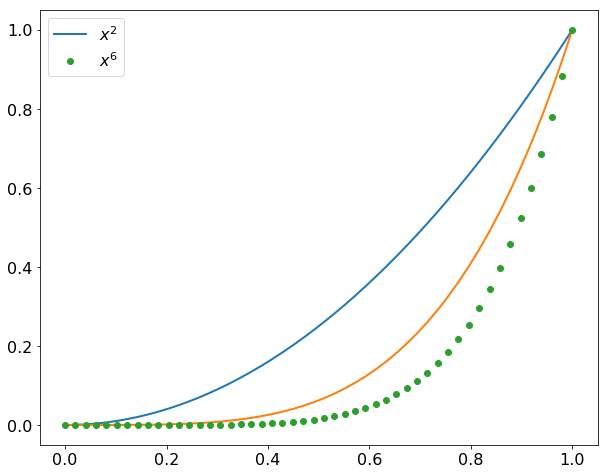

In [15]:
x = np.linspace(0, 1)

plt.plot(x, x**2, label=r'$x^2$')
plt.plot(x, x**4)
plt.plot(x, x**6, 'o', label=r'$x^6$')

plt.legend(loc='best');

**Remember**: Legend entries are only generated for plot objects that have a label (note x⁴ is missing)!

<a id=multiple_plots></a>
## Multiple plots in the same figure

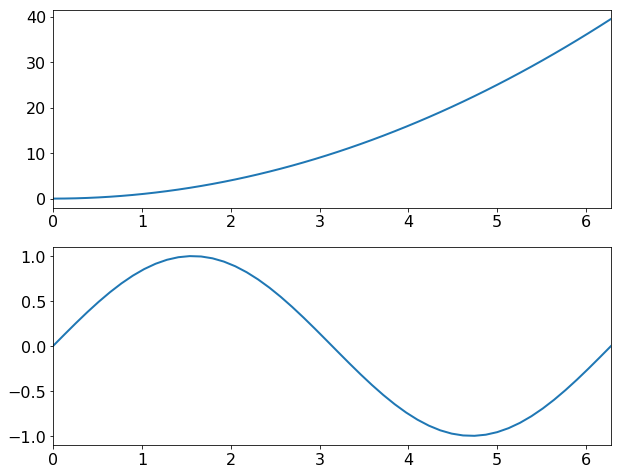

In [16]:
x = np.linspace(0, 2*np.pi)

# subplot arguments: # of rows, # of columns, plot index (row * (#cols) + col)
plt.subplot(2, 1, 1)
plt.plot(x, x**2)
plt.xlim(0, 2*np.pi)

plt.subplot(2, 1, 2)
plt.plot(x, np.sin(x))
plt.xlim(0, 2*np.pi);

<a id=shared_axes></a>
### Shared Axes

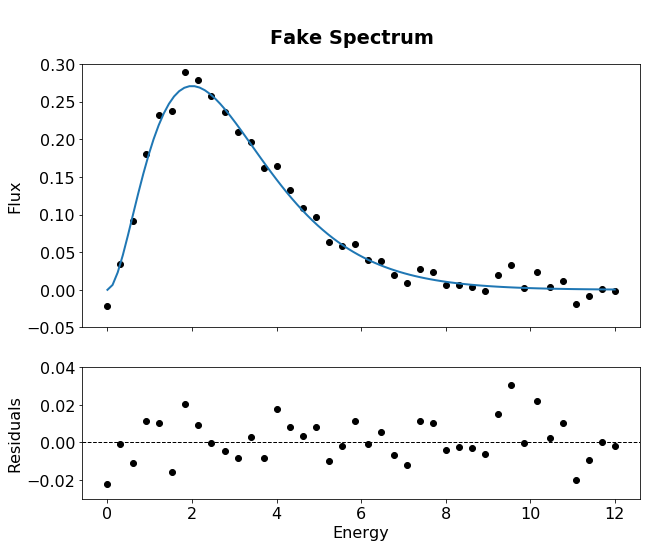

In [19]:
def poisson(x, k):
    return np.exp(-x)*x**k / np.math.factorial(k)

x = np.linspace(0, 12, 40)
y = poisson(x, 2)
y_noise = y + np.random.normal(0, 0.01, len(y))
z = np.linspace(0, 12, 100)

gridspec = {'height_ratios': [2, 1]}
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=gridspec)

ax1.plot(x, y_noise, 'ko')
ax1.plot(z, poisson(z, 2))
ax1.set_ylim(-0.05, 0.30)
ax1.set_ylabel('Flux')
#ax1.set_yticks(ax1.get_yticks()[1:])    # remove bottom y-tick

ax2.plot(x, y_noise - y, 'ko')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax2.set_xlabel('Energy')
ax2.set_ylim(-0.03, 0.04)
ax2.set_ylabel('Residuals')
#ax2.set_yticks(ax2.get_yticks()[:-2])   # remove top y-tick

#fig.subplots_adjust(hspace=0)
fig.suptitle('\nFake Spectrum', fontweight='bold');

<a id=tight_layout></a>
### You should almost always call `plt.tight_layout()`

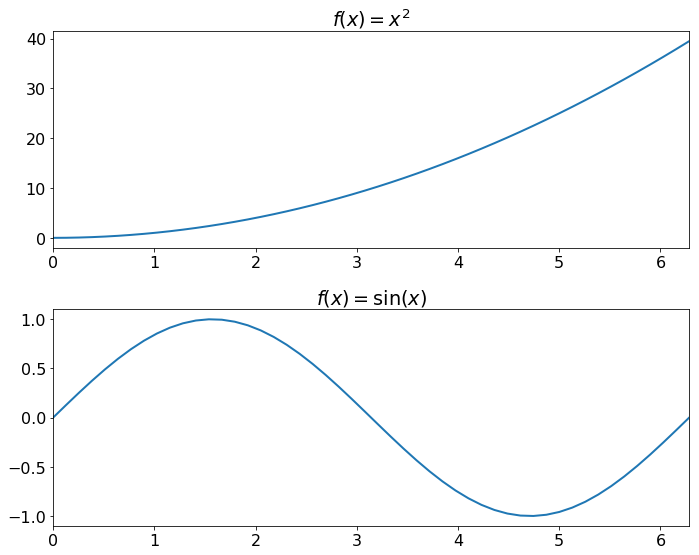

In [22]:
x = np.linspace(0, 2*np.pi)

plt.subplot(2, 1, 1)
plt.plot(x, x**2)
plt.xlim(0, 2*np.pi)
plt.title(r"$f(x)=x^2$")

plt.subplot(2, 1, 2)
plt.plot(x, np.sin(x))
plt.xlim(0, 2*np.pi)
plt.title(r"$f(x)=\sin(x)$")

plt.tight_layout()   # try commenting this line out!

<a id=inset_plots></a>
### Inset Plots (plot inside a plot)

In [ ]:
plt.plot(x, x**2)
plt.title("Outer Plot")

# axes coordinates: (0,0) is lower left, (1,1) upper right
plt.axes([0.2, 0.45, 0.3, 0.3])
plt.plot(x, x**3)
plt.title("Inner Plot");

<a id=error_bars></a>
# Error bars

In [ ]:
x = np.linspace(0, 2*np.pi, 10)
errX = np.random.normal(0, 0.4, 10)
errY = np.random.normal(0, 0.4, 10)

plt.errorbar(x + errX, x + errY, xerr=0.4, yerr=errY, fmt='o');

<a id=asym_errors></a>
## Asymmetrical errors

Give 2 arrays to the `xerr` or `yerr` kwargs:


In [ ]:
x = np.linspace(0, 1, 10)
plt.errorbar(
    x, 
    np.sin(2 * np.pi * x),
    yerr=[np.full_like(x, 0.5), np.full_like(x, 0.1)],
    linestyle='',
    marker='o',
)

<a id=upper_limits></a>
## Upper and lower limits


Often, we want to give uncertainties for some values, but upper or lower limits for others.

In [ ]:
bins = np.logspace(2, 4, 15)
x = (bins[:-1] + bins[1:]) / 2

y = x**(-2.7)
yerr = y * 0.3
y += np.random.normal(0, yerr)

# mask for which points are upper limits
uplims = np.full_like(x, False)

# last points are only upper limits
y[-3:] += 3 * y[-3:]
yerr[-3:] = 0.3 * y[-3:] # yerr determines length of limit arrow
uplims[-3:] = True 

plt.errorbar(
    x,
    y,
    xerr=np.diff(bins/2),
    yerr=yerr,
    uplims=uplims,
    ls='none',
)

plt.xlabel('$E \ / \ \mathrm{GeV}$')
plt.ylabel('$Flux \ / \ \mathrm{GeV}^{-1} \mathrm{s}^{-1} \mathrm{m}^{-2} \mathrm{sr}^{-1}$')
plt.xscale('log')
plt.yscale('log')

<a id=polar_plots></a>
# Polar Plots

<BarContainer object of 101 artists>

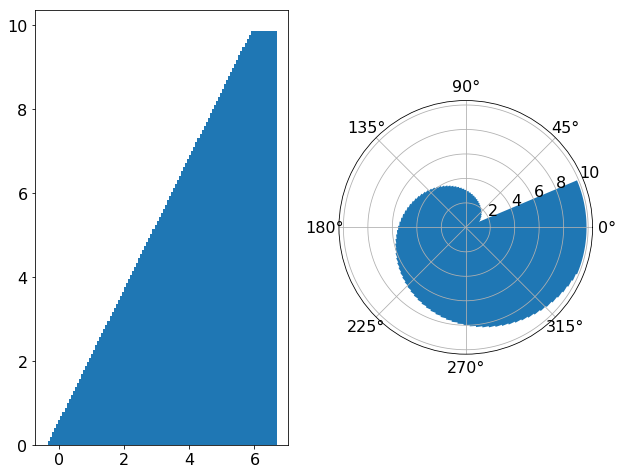

In [43]:
theta = np.linspace(0, 1*2*np.pi, 101)
r = theta/2*np.pi
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.bar(theta, r)
ax2 = fig.add_subplot(122, polar=True)
ax2.bar(theta, r)

In [ ]:
ax2.

In [33]:
theta

array([ 0.        ,  3.14159265,  6.28318531,  9.42477796, 12.56637061,
       15.70796327, 18.84955592, 21.99114858, 25.13274123, 28.27433388,
       31.41592654])

<a id=histograms></a>
# Histograms

<a id=hist1d></a>
## 1D Histograms

In [ ]:
# Generate random data:
x = np.random.normal(0, 1, 1000)
plt.hist(x, bins=25);

In [ ]:
x1 = np.random.normal(-1, 1, 1000)
x2 = np.random.normal(1, 1, 1000)

bin_edges = np.linspace(-6, 6, 51)  # 50 bins between -6 and 6

plt.hist(x1, bins=bin_edges, histtype='step', label='x1')
plt.hist(x2, bins=bin_edges, histtype='step', label='x2')

plt.legend();

<a id=hist2d></a>
## 2D Histograms

In [ ]:
mean = [2, 1]
cov = [[9, 2],
       [2, 4]]

x, y = np.random.multivariate_normal(mean, cov, size=10000).T

plt.hist2d(x, y)
# plt.hist2d(x, y, bins=50)
# plt.hist2d(x, y, bins=[25, 50], range=[[-10, 14], [-5, 7]])

plt.colorbar(label='Counts');

In [ ]:
from matplotlib.colors import LogNorm

plt.hist2d(x, y, bins=50, norm=LogNorm())

plt.colorbar();

### Colormaps

* Can influence perception greatly
* Physicists most loved colormaps (rainbow, jet) objectively bad
    * Do not work when printed black/white
    * Not colorblind friendly
    * Not perceptually uniform
* Use the modern colormaps in matplotlib (available since 1.5)
    * `viridis` (default in 2.0)
    * `inferno`
    * `magma`
    * `plasma`
* Use fitting colormaps: sequential vs. diverging

More here: 
https://www.youtube.com/watch?v=xAoljeRJ3lU&t=6s

<a id="scatter"></a>
# Scatter Plots

In [ ]:
x1, y1 = np.random.multivariate_normal([1, 1], [[1, 0], [0, 1]], 1000).T
x2, y2 = np.random.multivariate_normal([-1, -1], [[1, 0], [0, 1]], 1000).T

plt.scatter(x1, y1)
plt.scatter(x2, y2);

In [ ]:
x = np.append(x1, x2)
y = np.append(y1, y2)
s = np.random.uniform(5, 50, 2000)
label = np.append(np.ones_like(x1), np.zeros_like(x2))

plt.scatter(x, y, c=label, s=s);

<a id=oo_syntax></a>
# Using the object orientated syntax

Matplotlib has two APIs (yes, it's strange).

* The matlab-like syntax we used until now:
    * Easier to write
    * Familiar for matlab users
    * Frequently uses global states
* Object-oriented syntax:
    * More powerful
    * More control over the plots
    * Preferable for library code
    * No (or at least very few) global states

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 2*np.pi, 1000)

fig, (ax1, ax2) = plt.subplots(2, 1)

# note that plot is now a method of ax1, not the global plt object
ax1.plot(t, np.sin(t), 'r-')
ax1.set_title(r"$f(t)=\sin(t)$")   # use object-oriented get/set syntax
ax1.set_xlabel("$t$")
ax1.set_xlim(0, 2*np.pi)
ax1.set_ylim(-1.1, 1.1)

ax2.plot(t, np.cos(t), 'b-')
ax2.set_title(r"$f(t)=\cos(t)$")
ax2.set_xlabel("$t$")
ax2.set_xlim(0, 2*np.pi)
ax2.set_ylim(-1.1, 1.1)

fig.tight_layout()

<a id="mjd"></a>
# Providing both MJD and human readable date axis

* I am not able to convert MJD to normal date in my head
* Your audience probably is also not able to do it
* Solution: provide both a human readable and a MJD axis

Matplotlib uses the ordinal date (days since 1.1.1) for internal datetime representation

In [ ]:
from datetime import datetime, timedelta

# constants for ordinal and mjd date representation
MJD_EPOCH = datetime(1858, 11, 17)
ORDINAL_EPOCH = datetime(1, 1, 1)


def ordinal_to_mjd(ordinal):
    ''' Converts ordinal date (days since 0001-01-01T00:00) to MJD (days since 1858-11-17T00:00)'''
    return ordinal - (MJD_EPOCH - ORDINAL_EPOCH).total_seconds() / 86400


# create some random "Crab nebula" data
n_on = np.random.poisson(60, 25)
n_off = np.random.poisson(30, 25)
n_signal = n_on - 0.2 * n_off
n_signal_err = np.sqrt(n_on + 0.2**2 * n_off)

# create some dates
dates = [datetime(2017, 1, 1) + timedelta(days=i) for i in range(25)]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.errorbar(dates, n_signal, yerr=n_signal_err, ls='')
ax.axhline(n_signal.mean(), color='C1')

ax.set_ylim(0, 80)
ax.set_ylabel(r'Signal Rate / $\mathrm{h}^{-1}$')


fig.autofmt_xdate()

# create a second axis, using the same y-axis
ax_mjd = ax.twiny()
# set its xlims to the same values of the date axis, but convert to mjd
ax_mjd.set_xlim(*map(ordinal_to_mjd, ax.get_xlim()))
ax_mjd.set_xlabel('MJD')

fig.tight_layout()

<a id=publication_plots></a>
## Plots for Publication

* Use fully blown LaTeX installation using the `pgf` backend
* Same font and font sizes as in your publication
* Really high quality, publication ready plots



<a id=plot_styles></a>
## Plot styles

List available styles:

In [ ]:
print(plt.style.available)

In [ ]:
from scipy import stats

def plot_stuff():
    plt.subplot(2, 2, 1)
    x = np.linspace(-1, 1, 1000)
    plt.plot(x, np.sin(50*x**3)/(x))
    plt.grid()

    plt.subplot(2, 2, 2)
    x = np.linspace(-1, 1, 10)
    y = np.exp(-2.2*x) + np.random.normal(0, 0.1, 10)
    yerr = np.random.normal(0, 0.2, 10)
    plt.errorbar(x, y, yerr, fmt='o', capsize=3)
    plt.yscale('log')

    plt.subplot(2, 2, 3)
    x = stats.skewnorm.rvs(10, size=1000)
    plt.hist(x, bins=50)

    plt.subplot(2, 2, 4)
    x, y = np.mgrid[-1:1:.01, -1:1:.01]
    pos = np.dstack((x, y))
    z = stats.multivariate_normal([0.1, 0.3], [[0.2, 0.3], [0.1, 0.4]])
    plt.contourf(x, y, z.pdf(pos))

for plot_style in ['classic', 'bmh', 'fivethirtyeight', 'ggplot', 'seaborn']:
    plt.figure()
    with plt.style.context(plot_style):   # use context manager so that changes are temporary
        plot_stuff()
        plt.suptitle('Plot Style: ' + plot_style, fontweight='bold')

<a id=save_figures></a>
## Saving figures

Use `plt.savefig` to save your figure.

You can either give path relative to your working directory or an absolute path.
Not sure what the current working directory is?

In [ ]:
pwd()

In [ ]:
x = np.linspace(-5, 5)
plt.plot(x, x**3, marker='s')
plt.title("My Awesome Plot")

# save in current directory; extension determines file type
plt.savefig('awesome_plot.pdf')
plt.savefig('awesome_plot.eps')
plt.savefig('awesome_plot.png', dpi=300)   # bitmap graphics; don't use me for publications!
plt.savefig('awesome_plot.jpg', dpi=300)   # bitmap graphics; don't use me either!

# relative path with subdirectory
# plt.savefig('build/awesome_plot.pdf')

# absolute path
# plt.saveig('/path/to/output/directory/awesome_plot.pdf')